#### Preparing Audio Files for CNN


For the cnn we want to input a the mel spectrograms of audio files, cropped to the first minute.

Spectrograms are a way to visually represent a signal's loudness, or amplitude, as it varies over time at different frequencies. The horizontal axis is time, the vertical axis is frequency, and the color is amplitude. It is calculated using the fast Fourier transform on short time windows of the signal and transforming the vertical axis (frequency) to log scale and the colored axis (amplitude) to decibals.

Now, what about the "mel" part? Humans are better at detecting differences in lower frequencies than higher frequencies. The mel scale transforms the frequency scale such that sounds at equal distances from each other also sound equal in distance. A mel spectrogram is a spectrogram where the frequencies are converted to the mel scale.


### Toy Example


In [1]:
import sys
sys.path.append("..")

In [2]:
import warnings
import pandas as pd
from IPython.display import Audio
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
from PIL import Image
import librosa
from tqdm import tqdm
from src.utils.audio_utils import find_chorus
from src.utils.plot_utils import plot_audio_wave, plot_spectrogram
from src.utils.spectrograms import save_spectrogram, get_mel_spectrogram, get_spectrograms

warnings.filterwarnings("ignore")

In [3]:
AUDIO_DIR = "../data/track_downloads/"
CSV_PATH = "../data/audio_features.csv"
SPEC_DIR = "../data/spectrograms/"
SR = 22050

example_audio_path = AUDIO_DIR + "7ya7Jv4hJ9W0Baz7h9nL7E.wav"

### Extracting an Audio Signal

A signal is a variation in a quantity over time. For audio, the quantity that varies is air pressure. We can represent a signal digitally by taking samples of the air pressure over time. We are left with a waveform for the signal. Librosa is a python library that allows us to extract waveforms from audio files along with several other features. This is the primary package that will be used for this project.


In [4]:
# Extracting the wave, "y", and sampling rate, "sr", of the audio file
y, sr = librosa.load(example_audio_path, sr=SR, mono=True)
print(f"sampling rate: {sr}, wave shape: {y.shape}")

sampling rate: 22050, wave shape: (3366848,)


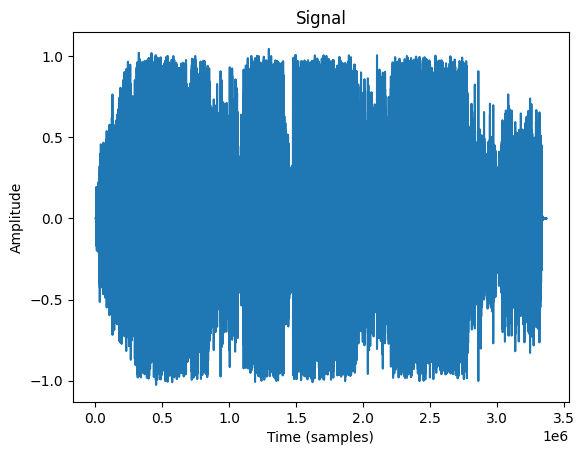

In [5]:
plot_audio_wave(y)

### Mel Spectrograms

Spectrograms are a way to visually represent a signal's loudness, or amplitude, as it varies over time at different frequencies. The horizontal axis is time, the vertical axis is frequency, and the color is amplitude. It is calculated using the fast Fourier transform on short time windows of the signal and transforming the vertical axis (frequency) to log scale and the colored axis (amplitude) to decibals. Now, what about the "mel" part? Humans are better at detecting differences in lower frequencies than higher frequencies. The mel scale transforms the frequency scale such that sounds at equal distances from each other also sound equal in distance. A mel spectrogram is a spectrogram where the frequencies are converted to the mel scale.

This is what will be the input to the cnn!


Mel Spectrogram shape: (128, 6576)


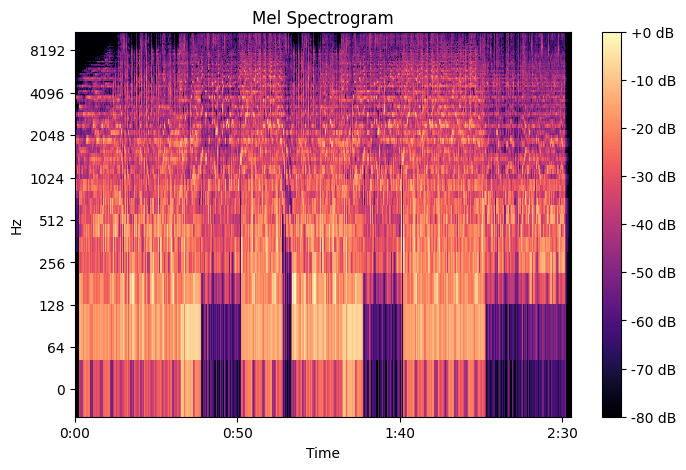

In [6]:
plot_spectrogram(y, sr)

#### Downloading mel spectrogram as a png image

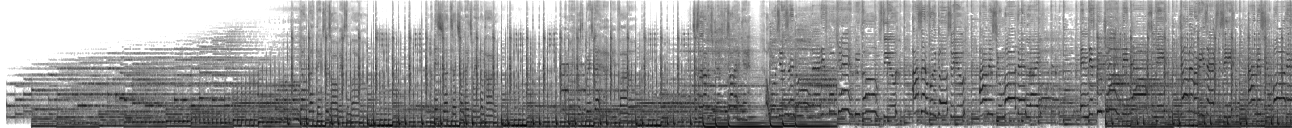

In [7]:
spec = get_mel_spectrogram(example_audio_path, offset=0, duration=60, hop_length=1024)
out_path = "../data/examples/mel_spectrogram.png"
save_spectrogram(spec, out_path)

# display image
img = Image.open(out_path)
display(img)

lower resolution (compressed)

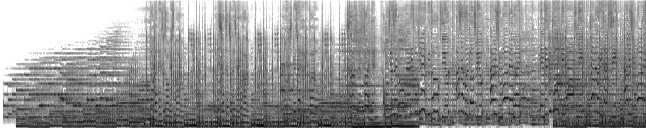

In [8]:
spec = get_mel_spectrogram(example_audio_path, offset=0, duration=60, hop_length=2048)
out_path = "../data/examples/mel_spectrogram_low.png"
save_spectrogram(spec, out_path)

# display image
img = Image.open(out_path)
display(img)

### Saving Many Mel Spectrograms as Images


Starting with the 500 most and least viral songs, across different combinations of settings

In [9]:
def many_spectrograms(top_or_bottom, res, duration, num_tracks, out_dir, chorus):
    # get length of csv
    df = pd.read_csv(CSV_PATH)
    num_tracks = len(df)
    start_index = 0 if top_or_bottom == "top" else num_tracks-500
    end_index = 500 if top_or_bottom == "top" else num_tracks-1

    get_spectrograms(AUDIO_DIR, CSV_PATH, out_dir, duration, start_index, end_index, res, chorus)
    

downloading spectrograms for all combinations

In [10]:
num_tracks = 500

# for res in ["low", "high"]:
#     for duration in [60, 30]:
#         for virality in ["top", "bottom"]:
#             out_dir = f"../data/spectrograms/{res}_{duration}_{num_tracks}/{virality}/"
#             many_spectrograms(virality, res, duration, num_tracks, out_dir, chorus=False)

do the same thing but with the song chorus instead of the track beginning

Best chorus found at 1 min 4.27 sec


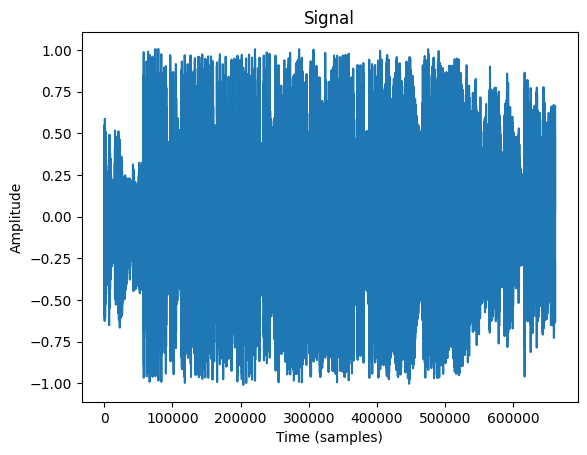

In [11]:
# example
chorus_start = find_chorus(example_audio_path, duration = 30)
y, sr = librosa.load(example_audio_path, offset=chorus_start, sr=SR, mono=True, duration=30) # type: ignore

plot_audio_wave(y)

Mel Spectrogram shape: (128, 1292)


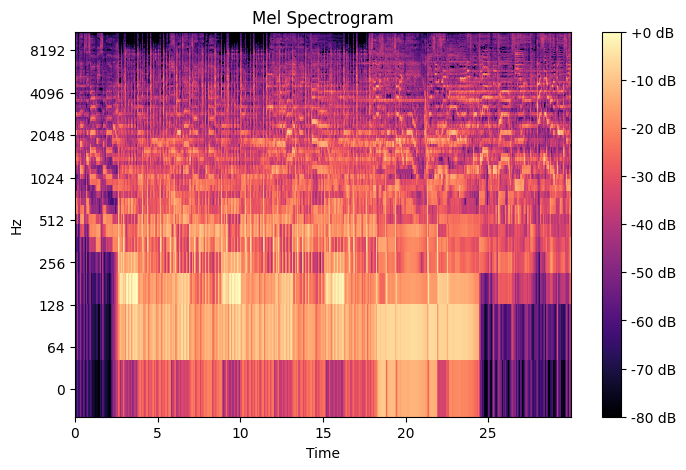

In [12]:
plot_spectrogram(y, sr)

In [13]:

for res in ["low", "high"]:
    for duration in [15, 30]:
        for virality in ["top", "bottom"]:
            out_dir = f"../data/spectrograms/ch_{res}_{duration}_{num_tracks}/{virality}/"
            many_spectrograms(virality, res, duration, num_tracks, out_dir, chorus=True)

Processing track 61 of 3932
Best chorus found at 2 min 5.91 sec
Processing track 62 of 3932
Best chorus found at 1 min 27.61 sec
Processing track 63 of 3932
Best chorus found at 1 min 42.31 sec
Processing track 64 of 3932
Best chorus found at 2 min 42.35 sec
Processing track 65 of 3932
Best chorus found at 1 min 21.12 sec
Processing track 66 of 3932
Best chorus found at 0 min 54.24 sec
Processing track 67 of 3932
Best chorus found at 2 min 49.34 sec
Processing track 68 of 3932
Best chorus found at 1 min 19.29 sec
Processing track 69 of 3932
No choruses were detected. Try a smaller search duration
Processing track 70 of 3932
Best chorus found at 2 min 56.62 sec
Processing track 71 of 3932
Best chorus found at 2 min 22.23 sec
Processing track 72 of 3932
Best chorus found at 2 min 3.68 sec
Processing track 73 of 3932
Best chorus found at 2 min 1.57 sec
Processing track 74 of 3932
Best chorus found at 3 min 12.34 sec
Processing track 75 of 3932
Best chorus found at 0 min 19.12 sec
Processi